#### visualizeGrid - User Manual
##### The following document provides an overview of the functions and output produced by the visualizeGrid application. 

##### 1. Import Libraries

In [1]:
from visualizeGrid_v1 import read_bands,aoi_zoom,plot_poly,plot_bands
from mapField import makeGrid, write_shapes,calc_zonal_stats,viz_zone_stat
import warnings
warnings.filterwarnings('ignore')
from bokeh.io import show
from bokeh.models import LogColorMapper
from bokeh.palettes import Viridis6 as palette
from bokeh.plotting import figure,output_notebook,ColumnDataSource,output_file
from bokeh.models import HoverTool
from collections import OrderedDict
import fiona

##### 2. Import Red and NIR Orthomap Image and define a name for the output NDVI band.

In [2]:
out_img = 'Bands/BB2_NDVI.tif'
in_red =  'Bands/BB2_red.tif'
in_nir = 'Bands/BB2_nir.tif'

##### 2. Read in New NDVI map and copy the affine transform matrix
#### read_bands(in_red,in_nir,out_img): 
###### function to calculate and return an NDVI raster image array and save the calculated band to a GeoTiff file. 
#### Arguments: 
###### in_red,in_nir: red and NIR spectral band geoTiff images. 
#### Returns: 
###### image array: An image array containing the NDVI values determined from the input image. 
# -
# -
#### plot_bands(out_image): 
###### Function to plot the calculated GeoTiff file generated by read_bands and copy the affine transform matrix of the GeoTiff. 
#### Arguments: 
###### img: A GeoTiff imgage. 
#### Returns: 
###### Affine Transform Matrix: The affine transform matrix of the input image returned as an 8 value list. 

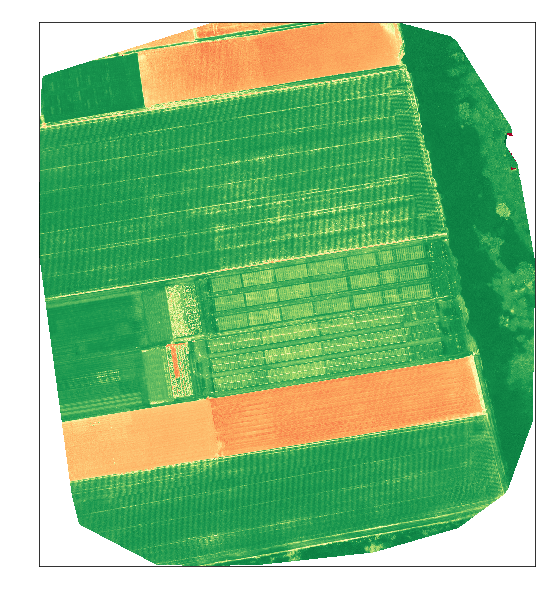

<Figure size 432x288 with 0 Axes>

In [3]:
ndvi = read_bands(in_red,in_nir,out_img)  
affine = plot_bands(out_img)

##### 3. Define Area of Interest and zoom to that region
#### - aoi_zoom(minx,maxx,miny,maxy,ndvi): 
###### Function to define an area of interest window and zoom to the window. 
##### - Arguments: 
###### The x and y extent points of the AOI defined by: minx, maxx, miny, maxy

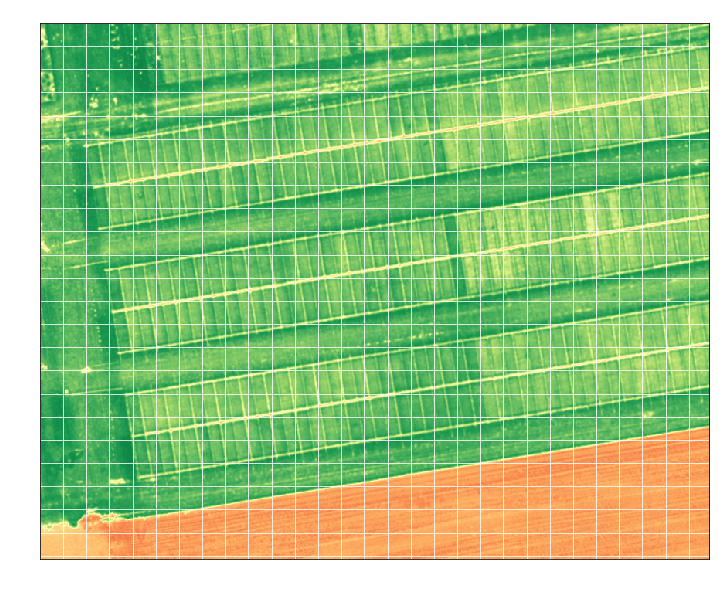

In [4]:
minx = 1350
maxx = 2200
miny = 2500
maxy = 3180
aoi_zoom(minx,maxx,miny,maxy,ndvi)

#### 4. Define the Field Grid Dimensions and Location
#### makeGrid(x,y,dx,dy,xo,yo,distance,angle,matrix,out_dest,in_csv,index_name):
###### Function to define a field plot and map it to the input GeoTiff file AOI view.

##### The 'makeGrid' function takes arguments in the following order:
###### horizontal_extent,vertical_extent,: x,y extend of grid
###### rows,cols - number of grid divisions in x and y
###### anchor_horizontal,anchor_vertical - North west anchor point 
###### of the grid around which the grid is rotated in a clock-wise direction.
###### inner_buffer - negative buffer distance for grid plot polygons
###### angle - CW angle of rotation of grid
###### affine - affine-transformation matrix to transform the output vector file to the coordinate projection of the input image file. 
###### out_put_file - Name and location of the output vector file that is created by the script.
###### index_names - attribute names of the unique ID mapped to each polygon included as a list.  
###### input_csv - csv file containing unique IDs to mapped to each generated polygon. The headers of the csv file should be the same as those included in the index_names list. 
###### -
###### -
##### Returns:
######  - polygons : translated and non-translated and rotated multiPolygon vector variable
######  - output shapefile: The plotted polygons are saved as GeoJSON file for later use. 


In [5]:
field_rows = 8
field_cols = 13
horizontal_extent = 432
vertical_extent = 427
angle = 81
inner_buffer = 8
anchor_horizontal = 1838
anchor_vertical = 2582
input_csv = 'test.csv'
output_dest = 'Results/BB2.geojson'
index_name = ['Trial#','Note']

apoly,poly = makeGrid(horizontal_extent,vertical_extent,field_rows,field_cols,
                      anchor_horizontal,anchor_vertical,inner_buffer,
                      angle,affine,output_dest,input_csv,index_name)

#### plot_poly(Mult_polygon,Raster_Array)

#### Arguments: 
###### Multi_polygon: a MultiPolygon array 
###### Raster_Array: A raster image array as returned by makeGrid

(1425.4100610109588, 2591.1529824450827, 1896.4267064522967, 3066.325897264195)


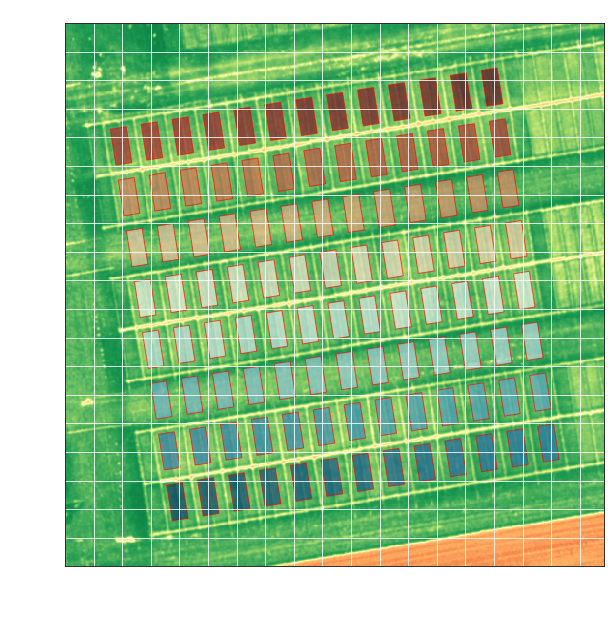

In [6]:
plot_poly(poly,ndvi)

#### 5. Write the polygons to a raster shape file

#### write_shapes(apoly,output_dest,input_csv,index_name):
###### Function to write the transformed polygons to a shapefile with attributes as defined in a csv file. See further description described in makeGrid. 
###### Note: This function is not necessary to call when using makeGrid

In [7]:
write_shapes(apoly,output_dest,input_csv,index_name)

##### calc_zonal_stats(output_dest,out_img,stats,output_shapefile)
###### Function to calculate the zonal statistics of the input raster file and save them as attributes to the mapped polygon shapefile. 
#### Arguments:
###### output_dest: location and name of output shapefile
###### stats: list of statistical parmeters to be calculated. 
###### supported statistical parameters are: min,max,mean,std (standard deviation), and count (sum of raster pixels overlapped by the polygon)

#### Returns: 
###### plot_data:An ordered dictionary of the field plot ID and mapped statistics. 
###### data_table: A geopandas dataframe of the calculated statistics for each plot polygon. 

In [8]:
stats= ['max','min','mean','std']
output_shapefile = 'Results/BB2_ZS.geojson'
plot_data,dt = calc_zonal_stats(output_dest,out_img,stats,output_shapefile)
dt

,Trial#,Note,max,min,mean,std,geometry
0,TP1,Test,0.877,0.737,0.8149999999999999,0.032,"POLYGON ((690679.2019866247 5764700.40634277, ..."
1,TP2,Test,0.855,0.6840000000000001,0.782,0.03,"POLYGON ((690682.183060244 5764700.878498447, ..."
2,TP3,Test,0.889,0.733,0.8129999999999999,0.036,"POLYGON ((690685.1641338633 5764701.350654123,..."
3,TP4,Test,0.864,0.722,0.788,0.026,"POLYGON ((690688.1452074825 5764701.822809801,..."
4,TP5,Test,0.871,0.745,0.82,0.027,"POLYGON ((690691.1262811018 5764702.294965477,..."
5,TP6,Test,0.868,0.714,0.8080000000000001,0.032,"POLYGON ((690694.1073547211 5764702.767121154,..."
6,TP7,Test,0.87,0.719,0.802,0.034,"POLYGON ((690697.0884283404 5764703.239276831,..."
7,TP8,Test,0.854,0.71,0.784,0.026,"POLYGON ((690700.0695019596 5764703.711432507,..."
8,TP9,Test,0.877,0.741,0.82,0.021,"POLYGON ((690703.0505755789 5764704.183588184,..."
9,TP10,Test,0.853,0.726,0.8080000000000001,0.019,"POLYGON ((690706.0316491982 5764704.655743861,..."


#### Visualize the Zonal Statistics
#### viz_zone_stat(output_shapefile,poly,uid):
###### Function to visualize the calculated zonal statistics in an interactive map. 
#### Arguments:
###### output_shapefile: A location and name of the updated shapefile. 
###### apoly: The affine transformed multi-polygon output of makeGrid to copy the attributes from. 
###### uid: The unique plot id header name defined in the 'in_csv' file used in makeGrid 
#### Output: 
###### An html plot with hover functionality to display the zonal statistics for each plot.

In [10]:
uid = 'Trial#'
viz_zone_stat(output_shapefile,apoly,uid)

Loading BokehJS ...